In [8]:
import numpy as np 
from matplotlib import pyplot as plt
import cv2


In [9]:
key_piont_pairs = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[8,12],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]

In [13]:
## flatted_input = random_input
#input_T,input_M,input_xn = flatted_input.shape
#input_pionts_unflat= np.zeros((input_T,input_M,int(input_xn/2),2))
#idx_len = int(input_xn/2)

#print("idx_len",idx_len)
#print("idx_len range",range(idx_len))
#print("input_pionts_unflat.shape:",input_pionts_unflat.shape)

def flatted_points_to_points(flatted_input):
    input_T,input_M,input_xn = flatted_input.shape
    input_pionts_unflat= np.zeros((input_T,input_M,int(input_xn/2),2))
    idx_len = int(input_xn/2)
    assert(len(flatted_input.shape)==3)
    assert(input_xn%2==0)
    for t in range(input_T):
        for m in range(input_M):
            for idx in range(idx_len):
                x_i = idx *2
                y_i =  idx *2 +1
                input_pionts_unflat[t][m][idx][0] = flatted_input[t][m][x_i]
                input_pionts_unflat[t][m][idx][1] = flatted_input[t][m][y_i]
    return input_pionts_unflat
#print(input_pionts_unflat)

In [14]:

#blank_image = np.zeros((360,640,3), np.uint8)
#plt.imshow(blank_image)
def draw_one_frame(key_pose_25_points):
    key_piont_pairs = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[8,12],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
    len_key_pose_25_points = len(key_pose_25_points)
    image = np.zeros((360,640,3), np.uint8)
    for pair in key_piont_pairs:
        # Start coordinate, here (225, 0) 
        # represents the top right corner of image 
        start_point_idx = pair[0]
        if start_point_idx < len_key_pose_25_points:
            start_point = (int(key_pose_25_points[start_point_idx][0]),int(key_pose_25_points[start_point_idx][1]))
            if start_point[0] == 0 or start_point[1] == 0:
                #print("skip pair: as it is 0",pair)
                continue
        else:
            #print("skip pair:",pair)
            continue 
        

        # End coordinate, here (0, 225) 
        # represents the bottom left corner of image 
        end_point_idx = pair[1]
        if end_point_idx < len_key_pose_25_points:
            end_point = (int(key_pose_25_points[end_point_idx][0]),int(key_pose_25_points[end_point_idx][1]))
            if end_point[0] == 0 or end_point[1] == 0:
                #print("skip pair: as it is 0",pair)
                continue
        else:
            #print("skip pair:",pair)
            continue 
        # Black color in BGR 
        color = (100, 0, 0) 

        # Line thickness of 5 px 
        thickness = 5

        # Using cv2.line() method 
        # Draw a diagonal black line with thickness of 5 px 
        #print("start_point,end_point",start_point,end_point)
        image = cv2.line(image, start_point, end_point, color, thickness)
    return image
    #plt.imshow(image)

    

In [15]:
from helper import *
bad_boy_input = get_frames('badboy')
print(np.array(bad_boy_input).shape)

(4131, 25, 2)


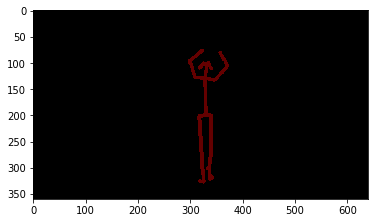

In [16]:
#print(input_pionts_unflat.shape)
#print(bad_boy_input[1000])
image = draw_one_frame(bad_boy_input[1000])
plt.imshow(image)

500


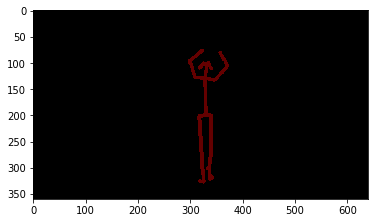

In [17]:
image = draw_one_frame(bad_boy_input[1000])

test_frame_array=[]
for i_t in range(1000,1500):
    one_frame = draw_one_frame(bad_boy_input[i_t])
    test_frame_array.append(one_frame)
print(len(test_frame_array)) 
plt.imshow(test_frame_array[0])


(360, 640, 3)


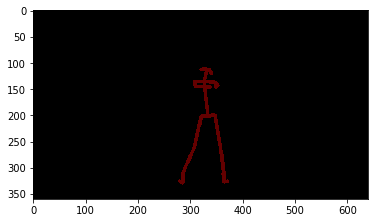

In [18]:
plt.imshow(test_frame_array[-1])
print(test_frame_array[-1].shape)

In [21]:
import numpy as np
import cv2

#cap = cv2.VideoCapture(0)

def images_to_video(input_images,output_path,frame_size=(640,360)):
    assert(len(input_images)>0)
    assert(len(output_path)>0)
    print("input_images[0]",len(input_images[0]))
    print("input_images[0][0]",len(input_images[0][0]))
    assert(frame_size[1] == len(input_images[0]))
    assert(frame_size[0] == len(input_images[0][0]))
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    #mp4_fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter('/home/ubuntu/dance-to-beats/src/model/output_real.avi',fourcc=fourcc,fps=20.0,frameSize=frame_size)

    for frame in input_images:
        #print("write,",len(frame))
        out.write(frame)

    plt.imshow(input_images[-1])

    # Release everything if job is finished
    out.release()


input_images[0] 360
input_images[0][0] 640


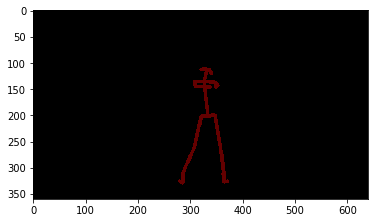

In [22]:
output_path='/home/ubuntu/dance-to-beats/src/model/output_real.avi'
images_to_video(input_images=test_frame_array,output_path=output_path,frame_size=(640,360))

In [23]:
#from IPython.display import Video

#Video("output1.avi",embed=True)
#Video('https://archive.org/download/Sita_Sings_the_Blues/Sita_Sings_the_Blues_small.mp4')
#path = './SampleVideo_1280x720_1mb.mp4'


#path = './bird.avi'
#Video("/home/ubuntu/dance-to-beats/data/frame_videos/bird.avi",embed=True)
#Video(output_path,embed=True)

In [ ]:
#scp -i /Users/sophieq/Downloads/sophie-oregon.pem /Users/sophieq/Downloads/SampleVideo_1280x720_1mb.mp4 ubuntu@ec2-54-187-97-108.us-west-2.compute.amazonaws.com:/home/ubuntu/dance-to-beats/data/frame_videos